In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard (1).csv


In [ ]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
import joblib


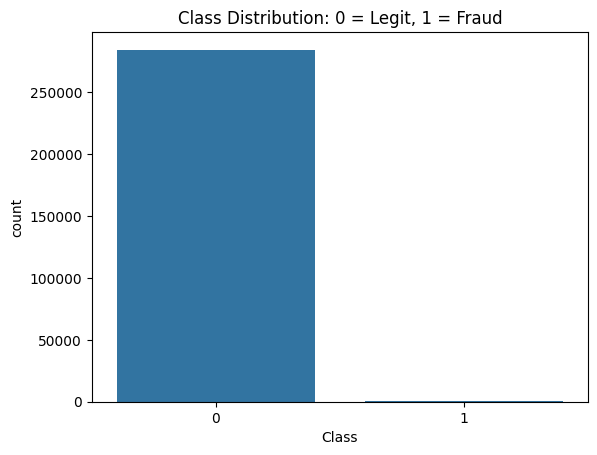

In [ ]:
# Step 3: Load dataset
df = pd.read_csv('/content/creditcard.csv')

# Check class distribution (fraud ratio)
sns.countplot(x='Class', data=df)
plt.title('Class Distribution: 0 = Legit, 1 = Fraud')
plt.show()


In [ ]:
# Step 4: Feature/target split + undersampling to balance fraud vs legit
X = df.drop('Class', axis=1)
y = df['Class']

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)


In [ ]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)


In [ ]:
# Step 6: Train XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Save trained model
joblib.dump(model, 'xgb_model.pkl')


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:28:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


['xgb_model.pkl']

In [ ]:
# Step 7: Model predictions + evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       148
           1       0.95      0.93      0.94       148

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

Confusion Matrix:
 [[141   7]
 [ 10 138]]
ROC-AUC Score: 0.9817841490138788


In [ ]:
# Step 8: Save test data for SHAP + Streamlit
X_test.to_csv('/content/X_test.csv', index=False)
y_test.to_csv('/content/y_test.csv', index=False)


In [ ]:
# ✅ Import files module from Colab
from google.colab import files

# ✅ Download model and test data to your computer
files.download('xgb_model.pkl')
files.download('X_test.csv')
files.download('y_test.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>